## Problema 1: Integración con Monte Carlo 
Resolver por Monte Carlo y exacta la siguiente integral:
$$
\int_{0}^{\pi}{x^2cos(x)dx}
$$

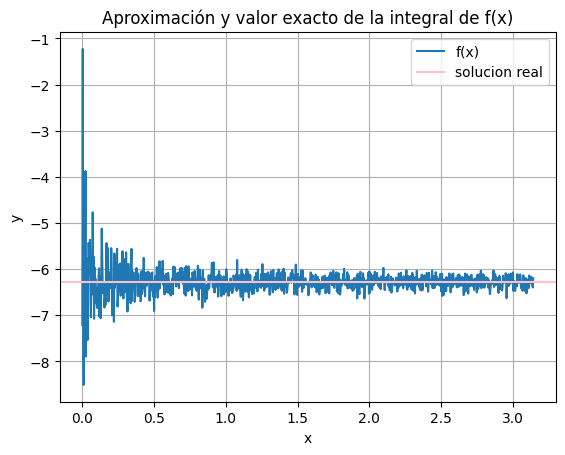

Aproximación de la integral de f(x) con el método de Monte Carlo: -6.411648251010371
Valor exacto de la integral de f(x) utilizando scipy.integrate.quad: -6.283185307179588


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definimos la función a integrar
def f(x):
    return (x**(2))*(np.cos(x))
  
# Definimos el intervalo de integración
a = 0
b = np.pi
def integral(N):
  def f(x):
    return (x**(2))*(np.cos(x))
  #lista vacia para llenar con los valores 
  valores =[]
  for i in range(N):
    N=10*(i+1)
# Generamos N puntos aleatorios en el intervalo [a, b]
    x = np.random.uniform(a, b, N)
# Evaluamos la función en los puntos generados
    
# Calculamos la aproximación de la integral utilizando el método de Monte Carlo
    I_mc = (b-a) * np.mean(f(x))
    valores.append(I_mc)#introducir los valores en la lista vacia
  return valores

# Generamos N puntos aleatorios en el intervalo [a, b]
x = np.random.uniform(a, b, 10000)
# Evaluamos la función en los puntos generados
fx = f(x)

# Calculamos la aproximación de la integral utilizando el método de Monte Carlo
mont = (b-a) * np.mean(fx)

  
# Calculamos la integral exacta utilizando scipy.integrate.quad
I_exact, _ = quad(f, a, b)

# Graficamos la función y la aproximación de la integral
x_plot = np.linspace(a, b, 1000)
y_plot = integral(1000)
plt.plot(x_plot, y_plot, label='f(x)')

# Graficamos la integral exacta
x_exact = np.linspace(a, b, 1000)
y_exact = np.zeros_like(x_exact)
for i, x_i in enumerate(x_exact):
    y_exact[i], _ = quad(f, a, x_i)
plt.axhline(y_exact[-1], color="pink", label="solucion real")

plt.title('Aproximación y valor exacto de la integral de f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()





print('Aproximación de la integral de f(x) con el método de Monte Carlo:', mont)
print('Valor exacto de la integral de f(x) utilizando scipy.integrate.quad:', I_exact)


##Problema de Termodinámica: 
Suponga que se tiene un sistema termodinámico formado por $2$ moles de gas ideal que ocupa un volumen de $10$ litros a una temperatura de $300 K$. El sistema experimenta una expansión isotérmica reversible hasta un volumen final de $20$ litros. Calcule el trabajo realizado por el sistema y compárelo con el valor teórico utilizando la ecuación de trabajo para una expansión isotérmica reversible.

Solución teórica:

El trabajo realizado por el sistema en una expansión isotérmica reversible viene dado por:

$$W = -n*R*T* ln(V_f/V_i)$$

Dónde:

* $n$ es el número de moles de gas
* $R$ es la constante de los gases ideales
* $T$ es la temperatura en kelvin
* $V_f$ es el volumen final del sistema
* $V_i$ el volumen inicial del sistema


En este caso, tenemos $n = 2 moles$, $R = 8.31 J/(mol K)$, $T = 300 K$, $V_i = 10 L$ y $V_f = 20 L$, por lo que el trabajo realizado por el sistema es:

$$W = -2 mol * 8,31 J/(mol K) * 300 K * ln(20 L / 10 L) = -3456.03 J$$



In [2]:
#importar libreria
import numpy as np


# Definir parámetros del sistema
n = 2  # cantidad de moles de gas
T = 300  # temperatura en K
V_i = 10  # volumen inicial en L
V_f = 20  # volumen final en L
R = 8.31  # constante de los gases ideales en J/(mol K)


## Definimos la función a integrar
def f(x):
    return 1/x

# Definimos el número de puntos a utilizar en el método de Monte Carlo
N = 10000

# Generamos N puntos aleatorios en el intervalo [a, b]
x = np.random.uniform(V_i, V_f, N)

# Evaluamos la función en los puntos generados
fx = f(x)

# Calculamos la aproximación de la integral utilizando el método de Monte Carlo
I_mc = (V_f-V_i) * np.mean(fx)

w=-n*R*T*I_mc

# Comparar con valor teórico
print("Valor del trabajo real: ", -n*R*T*np.log(V_f/V_i))
print("Valor del trabajo con montecarlo: ", w)

Valor del trabajo real:  -3456.0318422718874
Valor del trabajo con montecarlo:  -3458.7781341821933


###Problema mecanica cuantica
Se tiene un electrón que se encuentra en una caja unidimensional de longitud $L=0.5\ nm$. El electrón se encuentra en el estado excitado $\psi(x) = \sqrt{\frac{2}{L}}sen(\frac{2\pi x}{L})$. Se desea encontrar la probabilidad de encontrar al electrón en el intervalo de posiciones $x\in[0,L/4]$.

Para resolver este problema, se debe calcular la integral:
$$
P = \int_{0}^{\frac{L}{4}}{|\psi(x)|^2}dx = \int_{0}^{\frac{L}{4}}{(\sqrt{\frac{2}{L}}sen(\frac{2\pi x}{L}))^2}dx = \frac{1}{2}\int_{0}^{\frac{L}{4}}{sen^2(\frac{2\pi x}{L})}dx
$$
reemplazando el valor de $L$:
$$
P = \int_{0}^{0.125}{|\psi(x)|^2}dx = \frac{1}{2}\int_{0}^{0.125}{sen^2(\frac{2\pi x}{0.5})}
$$

Esta integral puede ser resuelta utilizando la identidad trigonométrica $\sin^2\theta = \frac{1}{2}(1-\cos(2\theta))$. Aplicando esta identidad, se tiene:

$$
P=\frac{1}{4}-\frac{1}{4}cos(\frac{\pi}{2}) = \frac{1}{4}-\frac{1}{4}*0=\frac{1}{4}
$$

Por lo tanto, la probabilidad de encontrar al electrón en el intervalo de posiciones $x\in[0,L/4]$ es de $\frac{1}{4}$.

In [3]:
#importar libreria
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
L=0.5 #tamaño de la caja
# Definimos la función a integrar
def f(x):
    return (((2/L)**(1/2))*np.sin((2*np.pi*x)/L))**2
L=0.5
# Definimos el intervalo de integración
a = 0
b = L/4

# Definimos el número de puntos a utilizar en el método de Monte Carlo
N = 10000

# Generamos N puntos aleatorios en el intervalo [a, b]
x = np.random.uniform(a, b, N)

# Evaluamos la función en los puntos generados
fx = f(x)

# Calculamos la aproximación de la integral utilizando el método de Monte Carlo
I_mc = (b-a) * np.mean(fx)

# Calculamos la integral exacta utilizando scipy.integrate.quad
I_exact, _ = quad(f, a, b)




print('El valor de la probabilidad  con el método de Monte Carlo:', I_mc)
print('El Valor exacto de la probabilidad utilizando scipy.integrate.quad:', I_exact)


El valor de la probabilidad  con el método de Monte Carlo: 0.24778378285698888
El Valor exacto de la probabilidad utilizando scipy.integrate.quad: 0.24999999999999997
